# `Slice` and `AlignmentDataset` objects

The `paste3.dataset` module provides an easy-to-use API to access input datasets to the `paste3` alignment algorithms.

The `Slice` class is a thin layer on top of an `AnnData` class, and an `AlignmentDataset` class is a collection of `Slice` objects.

In [1]:
from pathlib import Path

from paste3.dataset import AlignmentDataset
from paste3.napari.data.ondemand import get_file

Individual `Slice` objects are created by providing a path to an `.h5ad` file. Each `.h5ad` file is expected to contain an `AnnData` object, and is internally read using a `scanpy.read_h5ad`.

Here we download and cache a few `.h5ad` files locally using a `paste3.napari.data.ondemand.get_file` call. These are the files available as the Sample Data in the `paste3` napari plugin.

In [2]:
slice_files = [Path(f) for f in get_file("paste3_sample_patient_2_")]

A dataset is created using the paths to the individual slices.

In [3]:
dataset = AlignmentDataset(file_paths=slice_files)

Any individual slice can be rendered in a jupyter notebook by simply typing the slice variable name in a cell, which renders the slice using the `squidpy` library. (Note: This is roughly equivalent to doing `squidpy.pl.spatial_scatter(<slice>.adata, ..)`)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


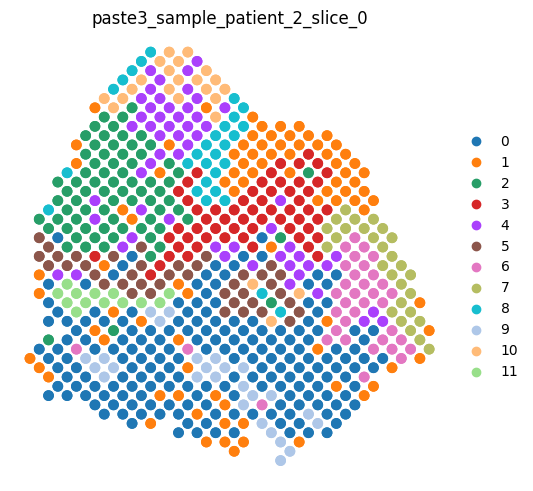

In [4]:
dataset.slices[0]

An entire dataset can be rendered by typing the dataset variable name in a cell, which renders each slice in order.

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


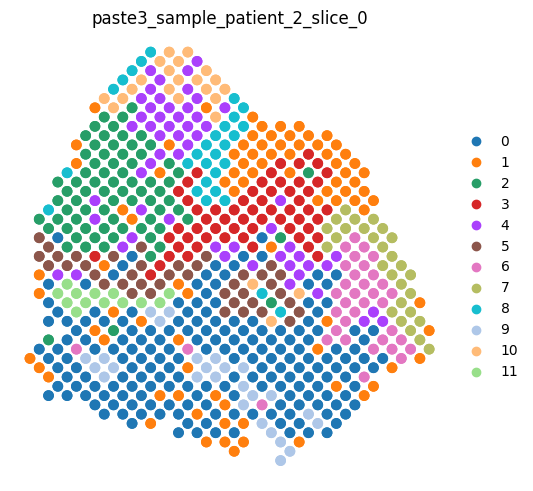

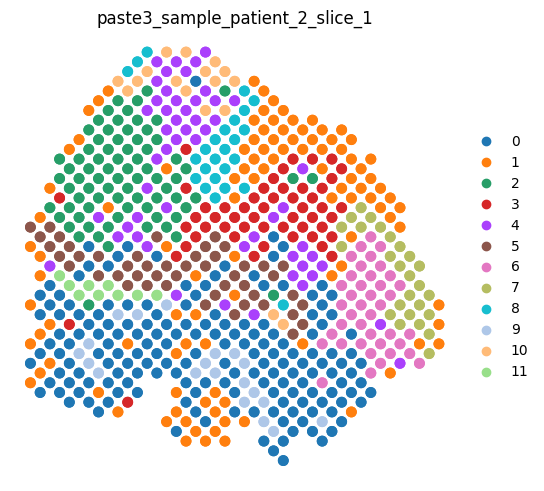

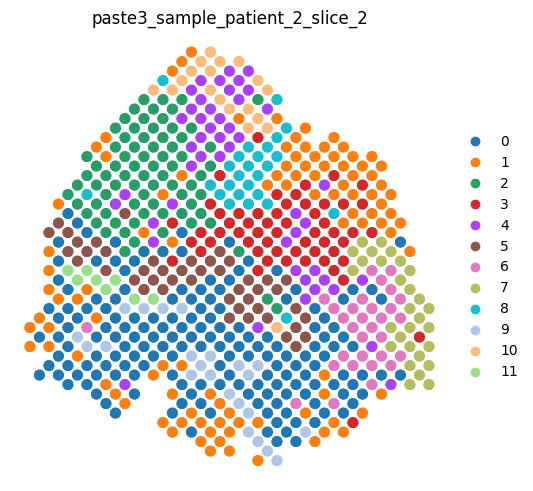

In [5]:
dataset

## Center Aligning a Dataset

A dataset object can be center aligned in 2 steps:

1. Find the "center slice" (or the "consensus slice") and similarity matrix between spots using the `<dataset>.find_center_slice` method. **This is a time consuming step and benefits from being run on a GPU-enabled environment.**
2. Use these values to center align the dataset using the `<dataset>.center_align` method.

The first returned value is the aligned dataset, along with other useful information (rotations/translations). Here we ignore all returned values except the first one.

Center alignment is explained in detail in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper.

In [6]:
center_slice, pis = dataset.find_center_slice()
aligned_dataset, *_ = dataset.center_align(center_slice=center_slice, pis=pis)

(INFO) (dataset.py) (20-Nov-24 15:18:20) Finding center slice


(INFO) (paste.py) (20-Nov-24 15:18:20) GPU is not available, resorting to torch CPU.


(INFO) (paste.py) (20-Nov-24 15:18:20) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:18:48) Iteration: 0


(INFO) (paste.py) (20-Nov-24 15:18:48) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (20-Nov-24 15:18:48) Slice 0


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(INFO) (paste.py) (20-Nov-24 15:18:49) Slice 1


(INFO) (paste.py) (20-Nov-24 15:18:50) Slice 2


(INFO) (paste.py) (20-Nov-24 15:18:50) center_ot done


(INFO) (paste.py) (20-Nov-24 15:18:50) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:18:59) Objective -142.8193949328928 | Difference: 142.8193949328928


(INFO) (paste.py) (20-Nov-24 15:18:59) Iteration: 1


(INFO) (paste.py) (20-Nov-24 15:18:59) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (20-Nov-24 15:18:59) Slice 0


(INFO) (paste.py) (20-Nov-24 15:19:00) Slice 1


(INFO) (paste.py) (20-Nov-24 15:19:00) Slice 2


(INFO) (paste.py) (20-Nov-24 15:19:01) center_ot done


(INFO) (paste.py) (20-Nov-24 15:19:01) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:19:12) Objective 0.8959830153756014 | Difference: 143.7153779482684


(INFO) (paste.py) (20-Nov-24 15:19:12) Iteration: 2


(INFO) (paste.py) (20-Nov-24 15:19:12) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (20-Nov-24 15:19:12) Slice 0


(INFO) (paste.py) (20-Nov-24 15:19:12) Slice 1


(INFO) (paste.py) (20-Nov-24 15:19:13) Slice 2


(INFO) (paste.py) (20-Nov-24 15:19:13) center_ot done


(INFO) (paste.py) (20-Nov-24 15:19:13) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:19:22) Objective 0.9023699346672065 | Difference: 0.006386919291605064


(INFO) (paste.py) (20-Nov-24 15:19:22) Iteration: 3


(INFO) (paste.py) (20-Nov-24 15:19:22) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (20-Nov-24 15:19:22) Slice 0


(INFO) (paste.py) (20-Nov-24 15:19:22) Slice 1


(INFO) (paste.py) (20-Nov-24 15:19:23) Slice 2


(INFO) (paste.py) (20-Nov-24 15:19:23) center_ot done


(INFO) (paste.py) (20-Nov-24 15:19:23) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:19:33) Objective 0.9035840438267082 | Difference: 0.0012141091595017084


(INFO) (paste.py) (20-Nov-24 15:19:33) Iteration: 4


(INFO) (paste.py) (20-Nov-24 15:19:33) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (20-Nov-24 15:19:33) Slice 0


(INFO) (paste.py) (20-Nov-24 15:19:34) Slice 1


(INFO) (paste.py) (20-Nov-24 15:19:34) Slice 2


(INFO) (paste.py) (20-Nov-24 15:19:34) center_ot done


(INFO) (paste.py) (20-Nov-24 15:19:34) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:19:43) Objective 0.9001675865891257 | Difference: 0.0034164572375825486


(INFO) (paste.py) (20-Nov-24 15:19:43) Iteration: 5


(INFO) (paste.py) (20-Nov-24 15:19:43) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (20-Nov-24 15:19:43) Slice 0


(INFO) (paste.py) (20-Nov-24 15:19:44) Slice 1


(INFO) (paste.py) (20-Nov-24 15:19:44) Slice 2


(INFO) (paste.py) (20-Nov-24 15:19:45) center_ot done


(INFO) (paste.py) (20-Nov-24 15:19:45) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (20-Nov-24 15:19:54) Objective 0.8994354210673527 | Difference: 0.0007321655217729095


(INFO) (paste.py) (20-Nov-24 15:19:54) Center slice computed.


(INFO) (dataset.py) (20-Nov-24 15:19:54) Center aligning


(INFO) (dataset.py) (20-Nov-24 15:19:54) Stacking slices around center slice


We can render the center slice and the aligned dataset as usual.

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


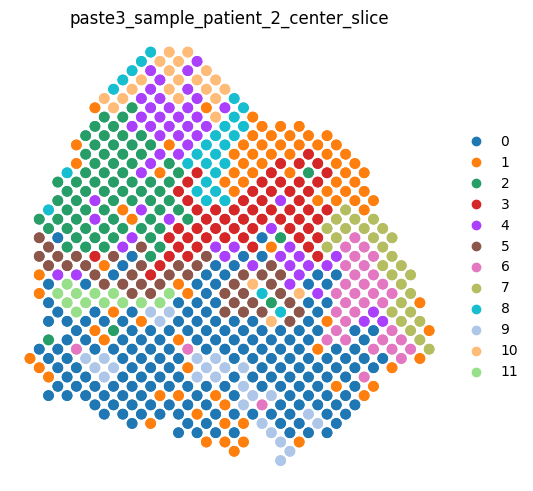

In [7]:
center_slice

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


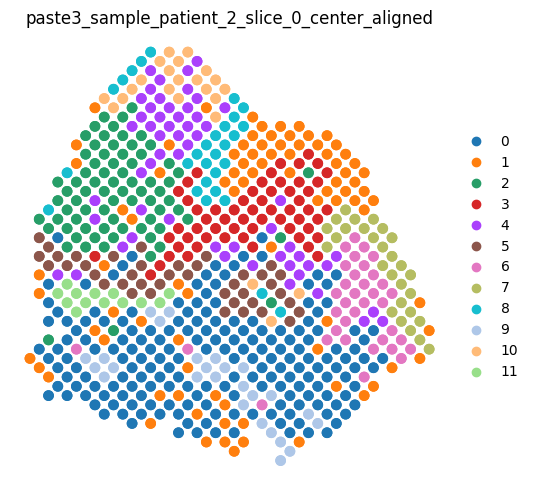

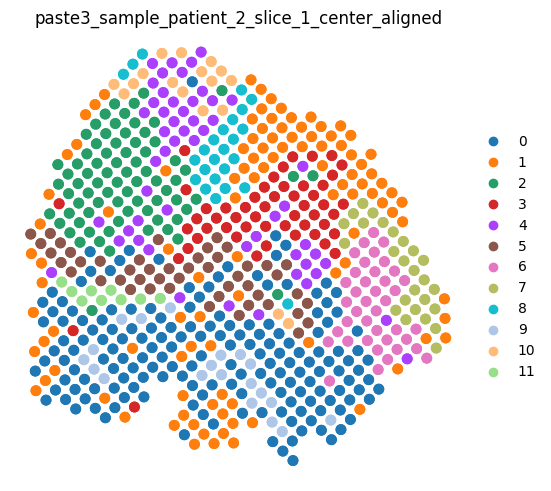

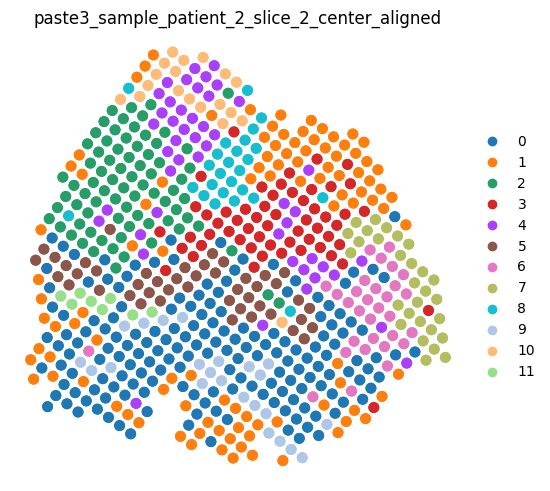

In [8]:
aligned_dataset

## Pairwise aligning a Dataset

A dataset can be pairwise aligned using the `<dataset>.pairwise_align` method. An `overlap_fraction` value (between 0 and 1) can be specified.

A value of `None` results in pairwise alignment that is identical to the approach mentioned in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper. Any other value between 0 and 1 results in pairwise alignment explained in the [Paste2](https://pubmed.ncbi.nlm.nih.gov/37553263/) paper.

In [9]:
pairwise_aligned_dataset = dataset.pairwise_align(overlap_fraction=0.7)

(INFO) (dataset.py) (20-Nov-24 15:19:56) Finding Pi for slices 0 and 1


(INFO) (paste.py) (20-Nov-24 15:19:56) GPU is not available, resorting to torch CPU.


(INFO) (dataset.py) (20-Nov-24 15:19:58) Finding Pi for slices 1 and 2


(INFO) (paste.py) (20-Nov-24 15:19:58) GPU is not available, resorting to torch CPU.


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


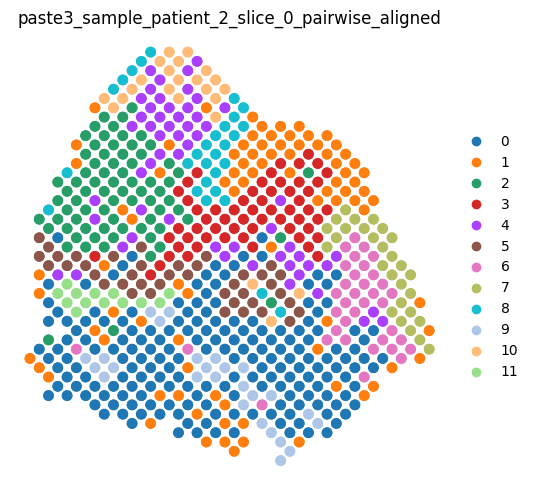

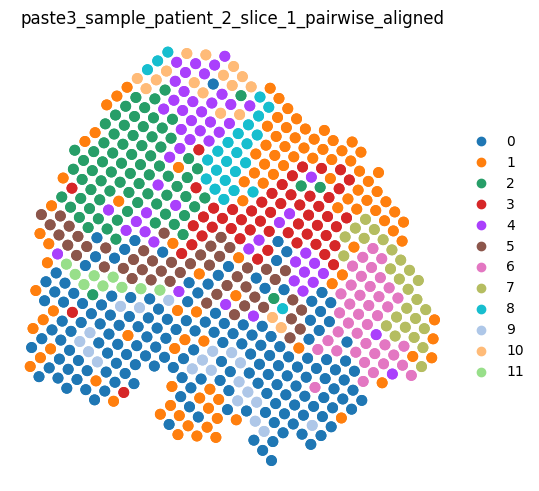

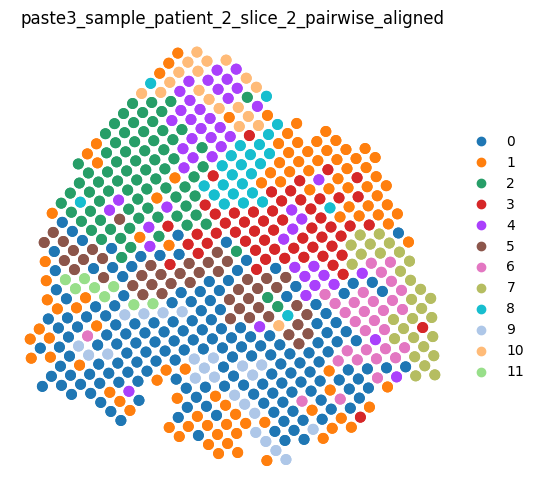

In [10]:
pairwise_aligned_dataset[0]